In [5]:
import numpy as np
import seaborn as sns
from keras.preprocessing.image import load_img, img_to_array
import matplotlib.pyplot as plt
import os
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from sklearn.metrics import classification_report
from imblearn.over_sampling import RandomOverSampler

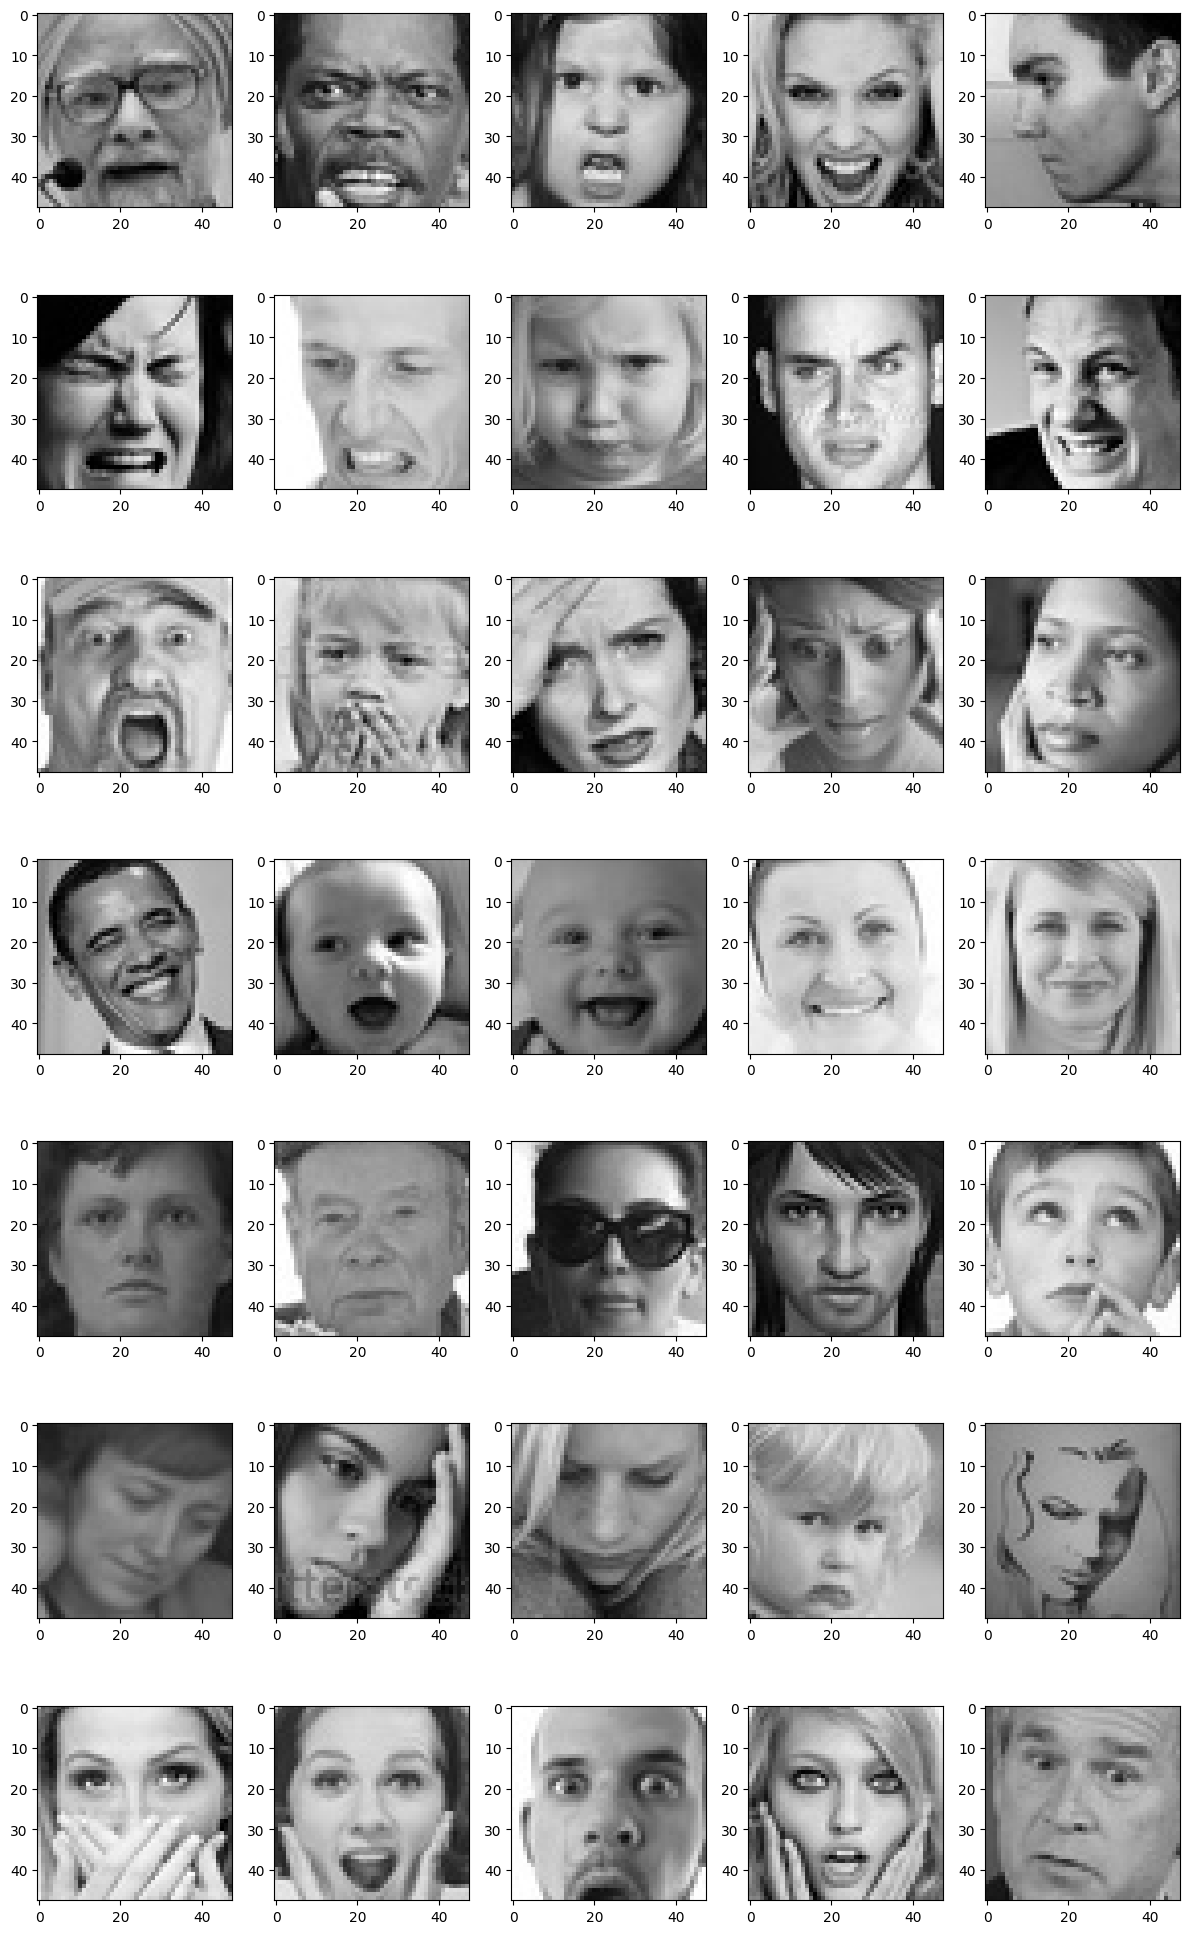

In [11]:
pic_size = 48
base_path = "C:/Users/admin/Desktop/Assignment2/task3/images/images/"

# Display some images for every different expression
plt.figure(0, figsize=(12,20))
cpt = 0

for expression in os.listdir(base_path + "train"):
    for i in range(1,6):
        cpt = cpt + 1
        plt.subplot(7,5,cpt)
        img = load_img(base_path + "train/" + expression + "/" +os.listdir(base_path + "train/" + expression)[i], target_size=(pic_size, pic_size))
        plt.imshow(img, cmap="gray")

plt.tight_layout()
plt.show()

In [12]:
# Image augmentation using keras ImageDataGenerator
batch_size = 128
train_datagen = ImageDataGenerator(
    rescale=1.0/255.0,
    width_shift_range=0.1,
    height_shift_range=0.1,
    rotation_range=20,
    horizontal_flip=True
)

validation_datagen = ImageDataGenerator(rescale=1.0/255)

train_generator = train_datagen.flow_from_directory(
    base_path + "train",
    target_size=(56, 56),
    color_mode="grayscale",
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=True
)

validation_generator = validation_datagen.flow_from_directory(
    base_path + "validation",
    target_size=(56, 56),
    color_mode="grayscale",
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)

Found 28821 images belonging to 7 classes.
Found 7066 images belonging to 7 classes.


C:\Users\admin\AppData\Local\Temp\ipykernel_7560\589253219.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=train_class_distribution, order=np.arange(len(train_class_labels)), palette="viridis")


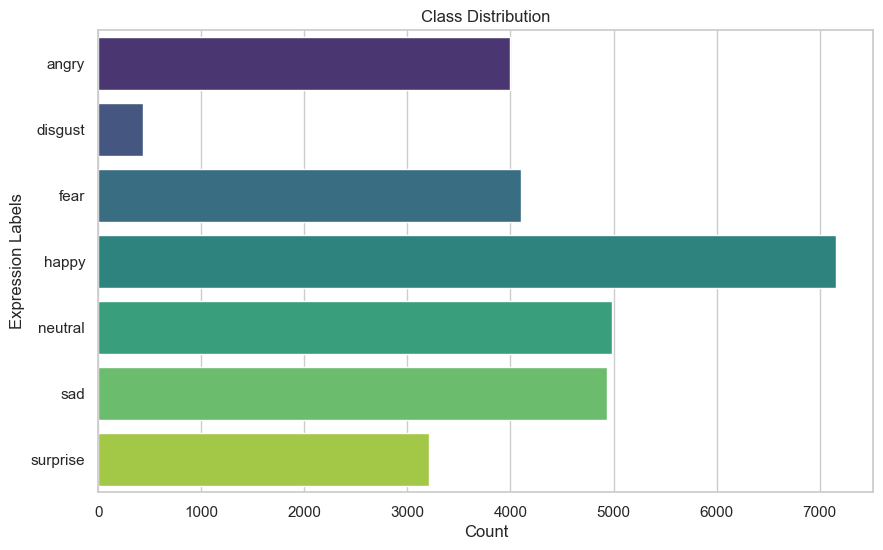

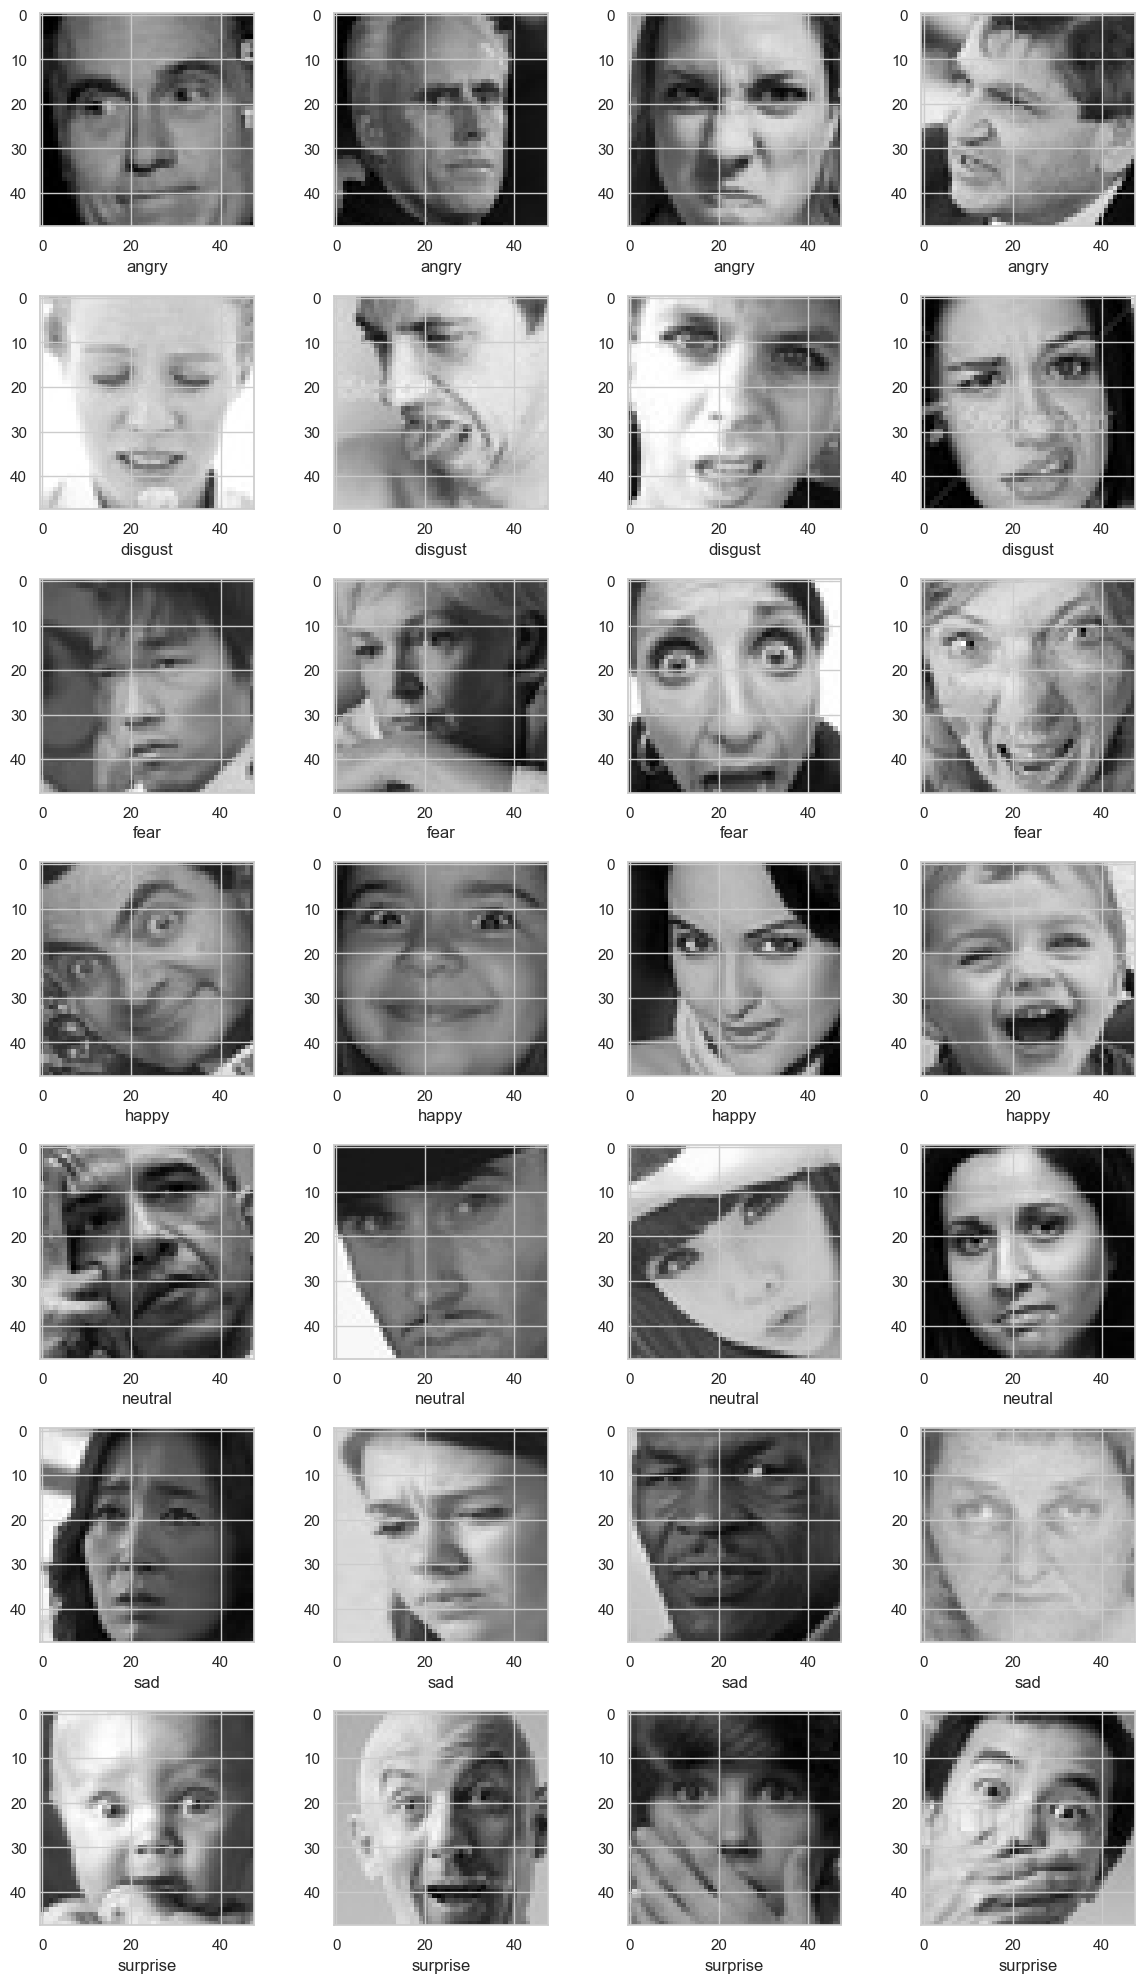

In [13]:
# Task 1: Exploratory Data Analysis
# Visualize the distribution of facial expression labels
train_class_distribution = train_generator.classes
train_class_labels = list(train_generator.class_indices.keys())

sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.countplot(y=train_class_distribution, order=np.arange(len(train_class_labels)), palette="viridis")
plt.title('Class Distribution')
plt.xlabel('Count')
plt.ylabel('Expression Labels')
plt.yticks(np.arange(len(train_class_labels)), train_class_labels)
plt.show()

# Display 4 random images from each expression class
plt.figure(0, figsize=(12, 20))
cpt = 0
for expression in os.listdir(base_path + "train"):
    for i in range(1, 5):
        cpt = cpt + 1
        plt.subplot(7, 4, cpt)
        img_path = np.random.choice(os.listdir(base_path + "train/" + expression))
        img = load_img(base_path + "train/" + expression + "/" + img_path, target_size=(pic_size, pic_size))
        plt.imshow(img, cmap="gray")
        plt.xlabel(expression)
plt.tight_layout()
plt.show()

In [14]:
# Task 2: Model Building and Optimization
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(56, 56, 1)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(7, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [15]:
# Task 3: Model Training and Evaluation
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.n // batch_size,
    epochs=20,
    validation_data=validation_generator,
    validation_steps=validation_generator.n // batch_size
)

Epoch 1/20
225/225 [==============================] - 132s 562ms/step - loss: 1.8291 - accuracy: 0.2430 - val_loss: 1.7673 - val_accuracy: 0.2673
Epoch 2/20
225/225 [==============================] - 122s 541ms/step - loss: 1.7770 - accuracy: 0.2666 - val_loss: 1.7239 - val_accuracy: 0.3341
Epoch 3/20
225/225 [==============================] - 117s 519ms/step - loss: 1.7460 - accuracy: 0.2888 - val_loss: 1.6572 - val_accuracy: 0.3453
Epoch 4/20
225/225 [==============================] - 117s 520ms/step - loss: 1.7088 - accuracy: 0.3148 - val_loss: 1.5884 - val_accuracy: 0.3757
Epoch 5/20
225/225 [==============================] - 117s 519ms/step - loss: 1.6795 - accuracy: 0.3311 - val_loss: 1.6253 - val_accuracy: 0.3678
Epoch 6/20
225/225 [==============================] - 117s 521ms/step - loss: 1.6603 - accuracy: 0.3421 - val_loss: 1.5092 - val_accuracy: 0.4327
Epoch 7/20
225/225 [==============================] - 117s 519ms/step - loss: 1.6353 - accuracy: 0.3550 - val_loss: 1.4864 -

In [19]:
# Task 4: Model Evaluation using appropriate metrics
target_names = train_class_labels
Y_pred = model.predict(validation_generator)
y_pred = np.argmax(Y_pred, axis=1)
print(classification_report(validation_generator.classes, y_pred, target_names=target_names))

56/56 [==============================] - 12s 193ms/step
              precision    recall  f1-score   support

       angry       0.42      0.24      0.31       960
     disgust       0.00      0.00      0.00       111
        fear       0.33      0.13      0.19      1018
       happy       0.61      0.85      0.71      1825
     neutral       0.46      0.49      0.47      1216
         sad       0.36      0.42      0.39      1139
    surprise       0.61      0.68      0.64       797

    accuracy                           0.50      7066
   macro avg       0.40      0.40      0.39      7066
weighted avg       0.47      0.50      0.47      7066



c:\Users\admin\Desktop\Assignment2\venv\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\admin\Desktop\Assignment2\venv\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\admin\Desktop\Assignment2\venv\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
